In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from natsort import natsorted

In [2]:
import sys
import os

# Assuming /AutomationModule is in the root directory of your project
sys.path.append(os.path.abspath(r'H:\phd stuff\tidy3d'))

from AutomationModule import * 

import AutomationModule as AM

In [3]:
tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [4]:
a = 5/3

RCP perm 11.56 runtime 1e-11ps nu 0.35 - 0.6.txt
Configured successfully.


11:55:44 W. Europe Daylight Time Billed flex credit cost: 4.535.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

Simulation Parameters (wavelengths are expressed in um):
lambda_range: 2.47 - 6.06 um 
lambdaw (pulse) 16.66666666666667 
lambda0 3.508771929824562 
Runtime = 10.0 
resolution = 15.0 
time_per_fwidth = 179.87547479999995 
final decay value = 0.0258 



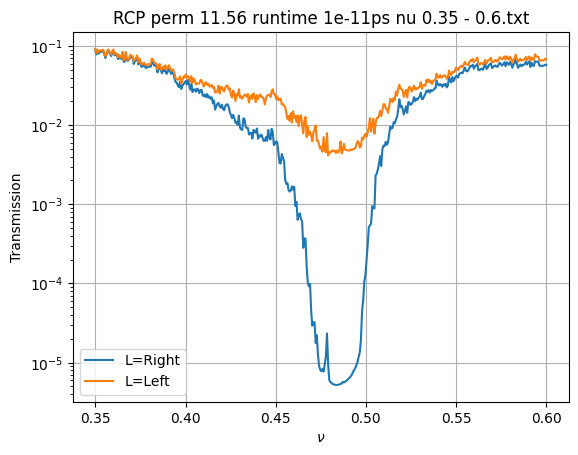

RCP perm 50 runtime 1e-11ps nu 0.09999999999999999 - 0.35.txt
Configured successfully.


Output()

11:55:46 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\08_19_2024 RCP Using  
                                 Tidy Structures Gap Diff Perm\z_incidence\RCP  
                                 perm 50 runtime 1e-11ps nu 0.09999999999999999 
                                 - 0.35.txt/Data_0.hdf5

11:55:47 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 3.32e-10 is greater than the simulation shutoff
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

Output()

11:55:52 W. Europe Daylight Time loading simulation from H:\phd                 
                                 stuff\tidy3d/output/data\08_19_2024 RCP Using  
                                 Tidy Structures Gap Diff Perm\z_incidence\RCP  
                                 perm 50 runtime 1e-11ps nu 0.09999999999999999 
                                 - 0.35.txt/Data.hdf5

11:56:28 W. Europe Daylight Time WARNING: Simulation final field decay value of 
                                 0.0345 is greater than the simulation shutoff  
                                 threshold of 1e-20. Consider running the       
                                 simulation again with a larger 'run_time'      
                                 duration for more accurate results.            

                                 Billed flex credit cost: 5.636.

                                 Note: the task cost pro-rated due to early     
                                 shutoff was below the minimum threshold, due to
                                 fast shutoff. Decreasing the simulation        
                                 'run_time' should decrease the estimated, and  
                                 correspondingly the billed cost of such tasks.

Simulation Parameters (wavelengths are expressed in um):
lambda_range: 3.92 - 66.7 um 
lambdaw (pulse) 16.66666666666667 
lambda0 7.407407407407407 
Runtime = 10.0 
resolution = 15.0 
time_per_fwidth = 179.87547479999995 
final decay value = 0.0345 



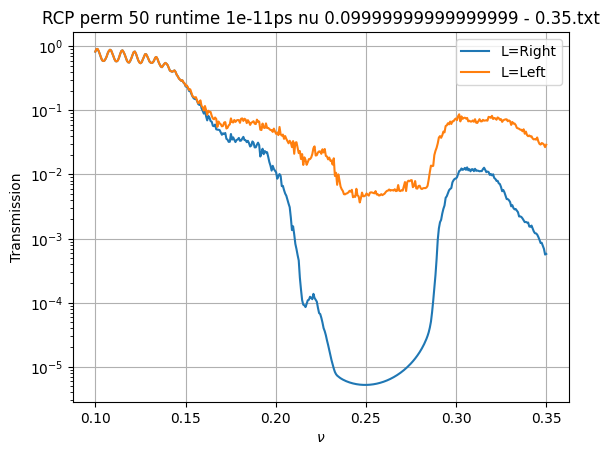

In [5]:
folder_path = r"H:\phd stuff\tidy3d\data\08_19_2024 RCP Using Tidy Structures Gap Diff Perm\z_incidence"

for i,filename in enumerate(natsorted(os.listdir(folder_path))):
    print(filename)
    file=os.path.join(folder_path, filename)
    sim_object_result = AM.loadFromFile(key = tidy3dAPI, file_path=file)
    print(sim_object_result.__str__())
    sim_data = sim_object_result.sim_data
    sim_data0 = sim_object_result.sim_data0
    transmission0 = sim_data0['flux1'].flux
    transmission = sim_data['flux1'].flux
    transmission_left0 = sim_data0['flux2'].flux
    transmission_left = sim_data['flux2'].flux
    transmission_normalized_left = transmission_left / transmission_left0
    transmission_normalized = transmission / transmission0
    monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
    plt.plot(monitor_lambdas,transmission_normalized, label=f"L=Right")
    plt.plot(monitor_lambdas,transmission_normalized_left, label=f"L=Left")
    plt.xlabel(r'$\nu$')
    plt.ylabel('Transmission')
    plt.legend()
    plt.grid()
    plt.yscale("log")
    plt.title(filename)
    plt.show()